In [1]:
#import all the libraries that we need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

full_data = [train,test]

## 1) Understanding the data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
#check for basic info using df.info()
#can get info about missing data
#Age,Cabin and Embarked has some Null value

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# df.describe only for numerical data
# get central tendency of the data
# by using df.describe we can get the numerical data

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(train.describe().columns)
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 2) Light Exploratory Data Analysis

From the df.describe we can get the numerical variable. So we split the features into two types, categorical and numerical (df_cat and df_num).

### i) For Categorical Data 
* Made bar charts to understand balance of classes 
* Made pivot tables to understand relationship with survival 

### ii) For numeric data 
* Made histograms to understand distributions 
* Corrplot 
* Pivot table comparing survival rate across numeric variables 

In [9]:
df_cat = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']
df_num = ['Age', 'SibSp', 'Parch', 'Fare']

### Categorical Data

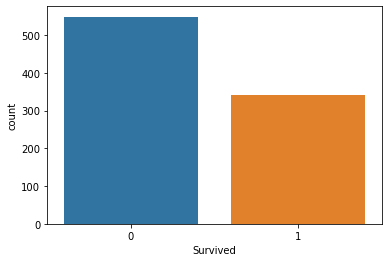

In [10]:
sns.countplot(x=df_cat[0],data=train)

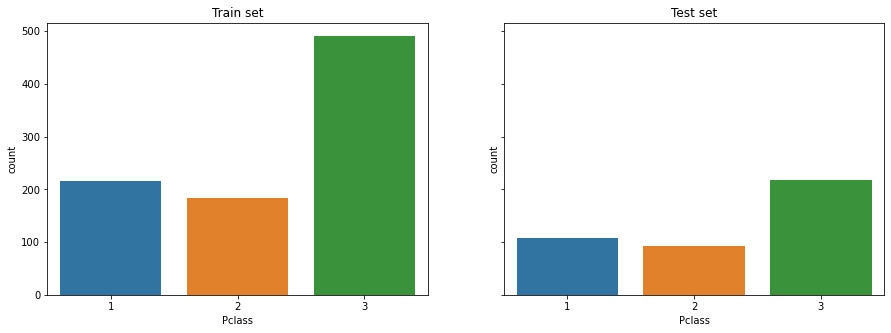

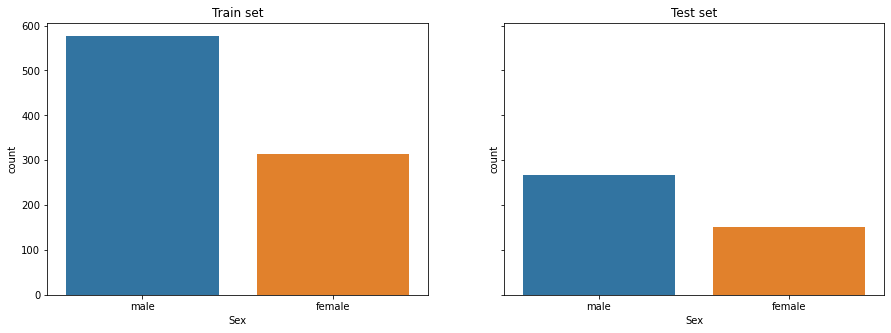

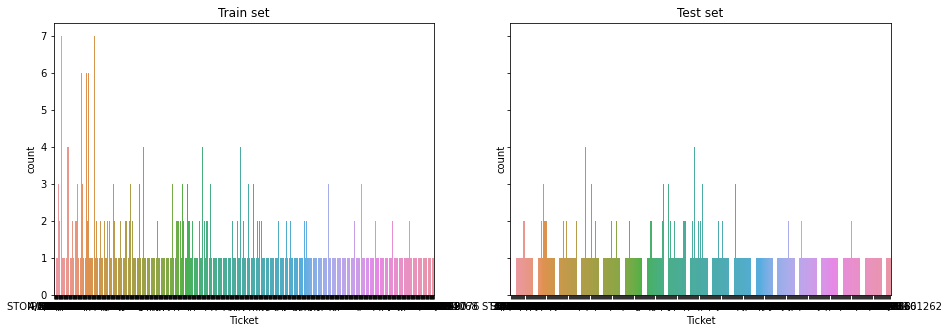

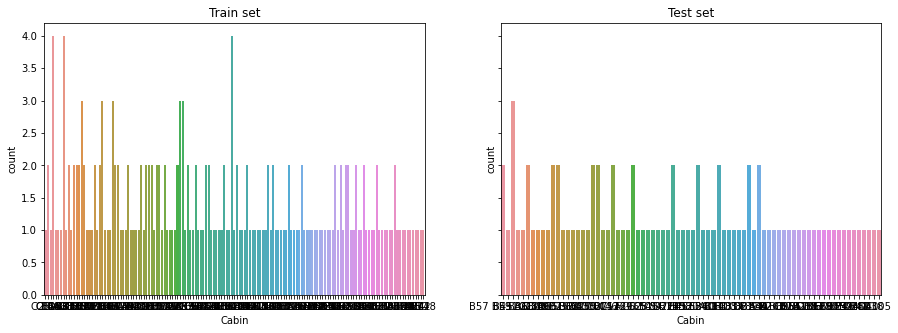

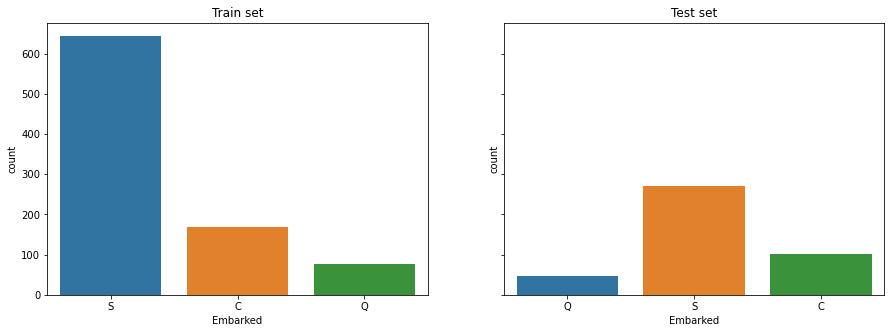

In [11]:
for i in range(1,6):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharey=True)
    sns.countplot(x=df_cat[i],data=train,ax=ax1)
    ax1.set_title('Train set')
    sns.countplot(x=df_cat[i],data=test,ax=ax2)
    ax2.set_title('Test set')        

Cabin and ticket graphs are very messy. This is an area where we may want to do some feature engineering! 

In [12]:
print(pd.pivot_table(train, index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(train, index='Survived',columns='Sex',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(train, index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Numerical Data

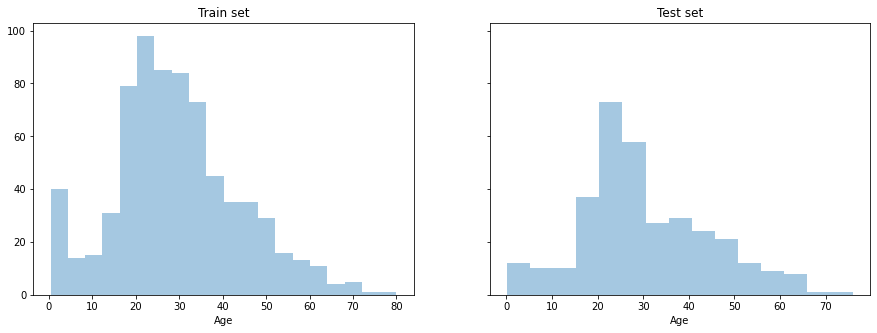

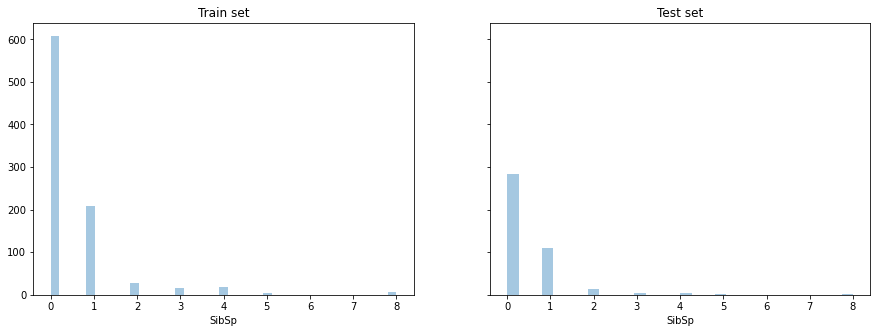

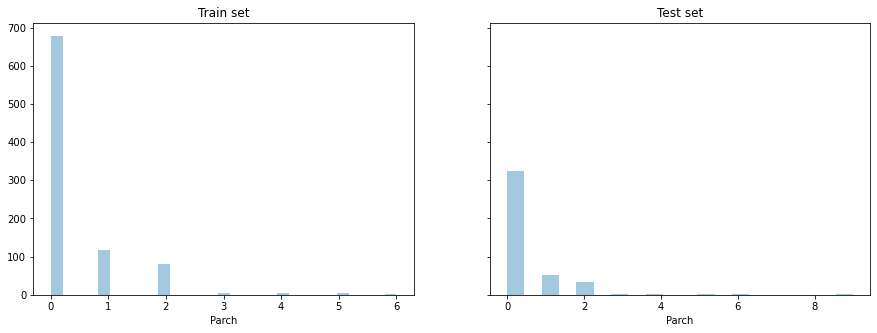

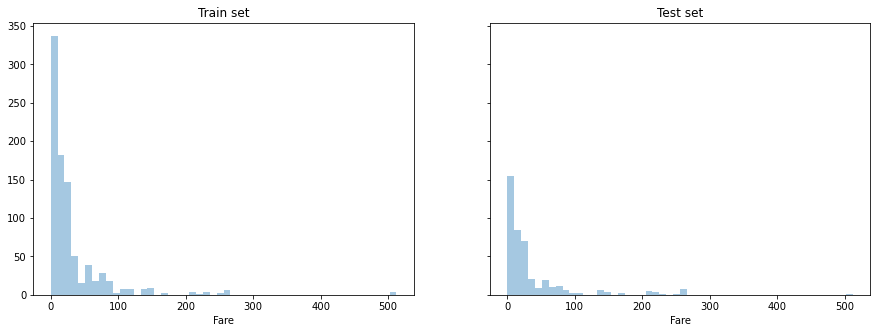

In [13]:
for i in range(0,4):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharey=True)
    sns.distplot(train[df_num[i]], kde=False, ax=ax1)
    ax1.set_title('Train set')
    sns.distplot(test[df_num[i]], kde=False, ax=ax2)
    ax2.set_title('Test set')        

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


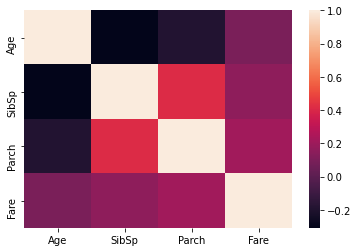

In [14]:
print(train[df_num].corr())
sns.heatmap(train[df_num].corr())

In [15]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


## 3) Data Cleaning

* In this section we will look for null value. We will decide either to remove it or replace it with their median/mean/mode.
* Next we will prepare our data for machine learning (features engineering)

In [16]:
# find the missing value
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* As we can see 'Age', 'Cabin', and 'Embarked' in `train data` has some missing value
* 'Age', 'Fare', and 'Cabin' in `test data` has some mising value 

In [18]:
# replace the missing data in Age columns by using their mean
train.Age = train.Age.fillna(train.Age.mean())
test.Age = test.Age.fillna(test.Age.mean())

# replace the missing data in Embarked columns by using its mode
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])

# replace the missing data in Fare columns by using its median
test.Fare = test.Fare.fillna(test.Fare.median())

In [19]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

For 'Cabin' features I choose to drop the whole columns in train and test data set

In [20]:
train = train.drop('Cabin',axis=1)
test = test.drop('Cabin',axis=1)
full_data = [train,test]

#### Feature Engineering

* Prepare all features for machine learning

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Features that need to be change in order to support the classification machine learning:
* Name
* Sex
* Age
* SibSp + Parch
* Fare
* Embarked

#### i) Name

In [22]:
#feature engineering on person's title 
train.Name.head(10)
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [23]:
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Capt              1
the Countess      1
Sir               1
Ms                1
Lady              1
Don               1
Mme               1
Jonkheer          1
Name: name_title, dtype: int64

We can replace many titles with a more common name or classify them as `Rare`.

In [24]:
train['name_title'] = train['name_title'].replace(['Lady', 'the Countess', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['name_title'] = train['name_title'].replace('Mlle', 'Miss')
train['name_title'] = train['name_title'].replace('Ms', 'Miss')
train['name_title'] = train['name_title'].replace('Mme', 'Mrs')

In [25]:
train['name_title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: name_title, dtype: int64

We convert the categorical titles to ordinal.

In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

train['name_title'] = train['name_title'].map(title_mapping)
train['name_title'] = train['name_title'].fillna(0)

Now we do the same for `test data`.

In [27]:
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

test['name_title'].value_counts()

test['name_title'] = test['name_title'].replace(['Lady', 'the Countess', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['name_title'] = test['name_title'].replace('Mlle', 'Miss')
test['name_title'] = test['name_title'].replace('Ms', 'Miss')
test['name_title'] = test['name_title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

test['name_title'] = test['name_title'].map(title_mapping)
test['name_title'] = test['name_title'].fillna(0)

#### ii) Sex

In [28]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#### iii) Age

In [29]:
# Create an AgeBand
train['Age'] = train['Age'].astype(int)
train['AgeBand'] = pd.cut(train['Age'], 5)

In [30]:
pd.pivot_table(train, index='AgeBand',columns='Survived',values='Ticket',aggfunc='count')

Survived,0,1
AgeBand,,
"(-0.08, 16.0]",45,55
"(16.0, 32.0]",344,181
"(32.0, 48.0]",111,75
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


In [31]:
# Replace Age with ordinals based on these bands.
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4

In [32]:
pd.pivot_table(train, index='Age',columns='Survived',values='Ticket',aggfunc='count')

Survived,0,1
Age,,
0,45,55
1,344,181
2,111,75
3,39,30
4,10,1


Now repeat the same step for the `test data`

In [33]:
test['Age'] = test['Age'].astype(int)
test['AgeBand'] = pd.cut(train['Age'], 5)

test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4

#### vi) SibSp + Parch

We create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [34]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [35]:
pd.pivot_table(train, index='FamilySize', columns='Survived', values='Ticket', aggfunc='count')

Survived,0,1
FamilySize,,
1,374.0,163.0
2,72.0,89.0
3,43.0,59.0
4,8.0,21.0
5,12.0,3.0
6,19.0,3.0
7,8.0,4.0
8,6.0,NaN
11,7.0,NaN


In [36]:
# We create another feature called IsAlone.
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

In [37]:
pd.pivot_table(train, index='IsAlone', columns='Survived', values='Ticket', aggfunc='count')

Survived,0,1
IsAlone,,
0,175,179
1,374,163


Now repeat the same step for the `test data`

In [38]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

#### v) Fare

In [39]:
# We create FareBand.
train['FareBand'] = pd.qcut(train['Fare'], 4)

In [40]:
pd.pivot_table(train, index='FareBand', columns='Survived', values='Ticket', aggfunc='count')

Survived,0,1
FareBand,,
"(-0.001, 7.91]",179,44
"(7.91, 14.454]",156,68
"(14.454, 31.0]",121,101
"(31.0, 512.329]",93,129


In [41]:
# Convert the Fare feature to ordinal values based on the FareBand.
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3

In [42]:
train['Fare'] = train['Fare'].astype(int)
pd.pivot_table(train, index='Fare',columns='Survived',values='Ticket',aggfunc='count')

Survived,0,1
Fare,,
0,179,44
1,150,67
2,127,102
3,93,129


Now repeat the same step for the `test data`

In [43]:
test['FareBand'] = pd.qcut(test['Fare'], 4)

pd.pivot_table(test, index='FareBand', columns='Sex', values='Ticket', aggfunc='count')

Sex,0,1
FareBand,,
"(-0.001, 7.896]",84,30
"(7.896, 14.454]",71,26
"(14.454, 31.472]",61,41
"(31.472, 512.329]",50,55


In [44]:
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3

test['Fare'] = test['Fare'].astype(int)

#### vi) Embarked

In [45]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#### Update the new dataframe for machine learning

In [46]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'name_title', 'AgeBand',
       'FamilySize', 'IsAlone', 'FareBand'],
      dtype='object')

In [47]:
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'name_title', 'FamilySize', 'IsAlone']]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,name_title,FamilySize,IsAlone
0,0,3,0,1,0,0,1,2,0
1,1,1,1,2,3,1,3,2,0
2,1,3,1,1,1,0,2,1,1
3,1,1,1,2,3,0,3,2,0
4,0,3,0,2,1,0,1,1,1


In [48]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'name_title', 'AgeBand', 'FamilySize',
       'IsAlone', 'FareBand'],
      dtype='object')

In [49]:
test = test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'name_title', 'FamilySize', 'IsAlone']]

In [50]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,name_title,FamilySize,IsAlone
0,3,0,2,0,2,1,1,1
1,3,1,2,0,0,3,2,0
2,2,0,3,1,2,1,1,1
3,3,0,1,1,0,1,1,1
4,3,1,1,1,0,3,3,0


In [51]:
full_data = [train,test]

## 5) Modelling

In [52]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_sc = knn.score(X_train, y_train)

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
DT_sc = tree.score(X_train, y_train)

In [60]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)
LR_sc = logr.score(X_train, y_train)

In [61]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
svc_sc = svc.score(X_train, y_train)

In [62]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
RF_sc = random_forest.score(X_train, y_train)

In [65]:
models = pd.DataFrame({
    'Model': [ 'KNN','Decision Tree', 'Logistic Regression','Support Vector Machines',  
              'Random Forest'],
    
    'Score': [knn_sc, DT_sc, LR_sc, svc_sc, RF_sc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,0.887767
4,Random Forest,0.887767
0,KNN,0.848485
2,Logistic Regression,0.815937
3,Support Vector Machines,0.805836
